# Packages we work with in this notebook
We are going to use the following libraries and packages:

* **numpy**: NumPy is the fundamental package for scientific computing with Python. (http://www.numpy.org/)
* **sklearn**: Scikit-learn is a machine learning library for Python programming language. (https://scikit-learn.org/stable/)
* **matplotlib**: Matplotlib is a visualization library in Python. (https://matplotlib.org/)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Introduction to the dataset

**Name**: UCI ML digit image data

**Summary**: Images of hand-written digits in UCI ML repository

**number of features**: 8*8(64) pixels (features)

**Number of data points (instances)**: 1797

**dataset accessibility**: Dataset is available as part of sklearn package.




## Loading the dataset and separating features and labels
The dataset is available as part of sklearn package. Hence, we do not need to import the data directly from UCI ML repository. 

In [0]:
from sklearn import datasets

# Loading digit images
digits = datasets.load_digits()
# separating feature arrays of pixel values (X) and labels (y) 
input_features = digits.data
output_var = digits.target
# printing number of features (pixels) and data points 
n_samples, n_features = input_features.shape
print("number of samples (data points):", n_samples)
print("number of features:", n_features)

number of samples (data points): 1797
number of features: 64


# t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is an algorithm to optimally map the higher dimensional space to lower dimensions paying attention to short distances. The trasformation is different for different regions. SNE is the general concept behind this type of mapping and "t" shows usage of t-distribution in t-SNE. 

**Parameters of t-SNE:**

* ***Perplexity (perplexity)***: somehow shows the number of close neighbors each point has. Hence, perplexity should be smaller than the number of points. There is a suggested range for perplexity in the original paper: "The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.". Although perplexity=5 is usually not optimal, values higher than 50 also may result in weird grouping of the data points and shapes in 2 dimensional space. 

* ***Number of iterations (n_iter)*** required for converagence of the approach is another important parameter that depened on the input dataset. There are no fixed number to make sure of the convergence but there are some rule of thumb to check that. As an example, if there are pinched shapes in the t-SNE plot, it is better to run the approach for higher iteration number to makes sure that the resulted shapes and clusters are not artifacts of an unconverged t-SNE.

## Implementing t-SNE on the dataset
We first need to initialize the model by specifying its hyperparameters and then fit using the feature values in input_features. 

**Hyperparameters of t-SNE**
* **n_components**: Dimension of the lower dimensional space after implementing t-SNE
* **init**: Initialization of embedding
* **perplexity**: Check the definition above
* **learning_rate**: Learning rate of t-SNE
* **n_iter**: Maximum number of iterations for the optimization
* **random_state**: seed for random number generator in the model



In [0]:
from sklearn import manifold

# Initializing the model
model_init = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2)

# Fitting the model using the inpur array
embedding_tsne = model_init.fit_transform(input_features)

## Writing a plotting function for visualizing the results of t-SNE
t-SNE is an unsupervised dimensionality reduction approach. However as we have the labes of the images, we can visualize the images in the 2-dimensional space, generated by t-SNE, to check how the images are grouped together.

In [0]:
def embedding_plot(X,labels,title):
  # scatter plot of data points 
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=5)
  plt.gca().set_facecolor((1, 1, 1))
  # specifyign labels of x and y axis
  plt.xlabel('1st dimension', fontsize=24)
  plt.ylabel('2nd dimension', fontsize=24)
  # showing the colorbar in the figure
  plt.colorbar(boundaries=np.arange((len(np.unique(labels))))-0.5).set_ticks(np.arange(10))
  # removing the grid
  plt.grid(False)
  # specifying the plot title
  plt.title(title, fontsize=24);

Now we can use the plotting function to show the results of t-SNE on the image dataset.

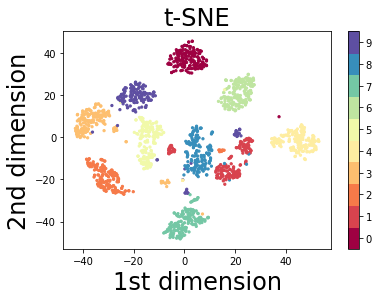

In [0]:
embedding_plot(embedding_tsne, output_var,"t-SNE")

## Important points for interpretation of t-SNE result

1) Data points tha are grouped together (zeros, ones, etc.) were potentially together in the high dimensional space. But we need to remember that t-SNE is not a proof for neighbourhood of data points in the original space.

2) Large distances between the data points are not meaningful. If some groups of data points are closer to each other, it does not necessarily mean that they were closer in the original (high dimensional) space.

3) Densities of clusters (groups of data points) are not meaningful. If there are groups which are a bit denser than others, it does not mean that they were closer to each other in the high dimensional space. t-SNE tries to make the groups beautifully spread resulting in good visualization quality. 